In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
%matplotlib inline
import seaborn as sns # seaborn 시각화 패키지
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "AplleGothic"

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

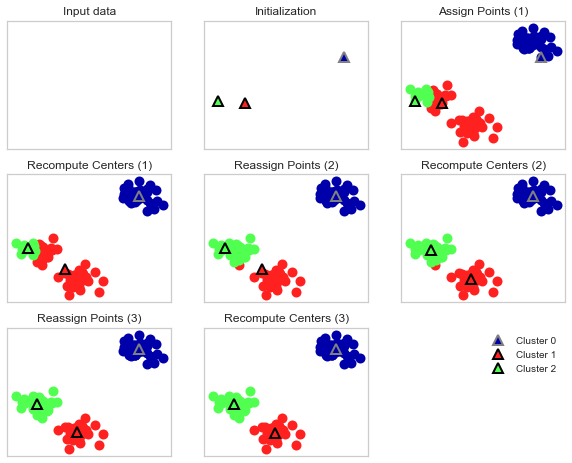

In [204]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

In [205]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn import cluster
from sklearn.cluster import KMeans

In [206]:
data = pd.read_csv('C:/Users/user/부산_수소차_정제.csv', encoding = "euc-kr")

In [207]:
df = pd.DataFrame(data)
df.head()

,시도,시군구,읍면동,차종,수소,주소_법정동
0,부산광역시,강서구,강동동,승용,7,부산광역시 강서구 강동동
1,부산광역시,강서구,강동동,승합,0,부산광역시 강서구 강동동
2,부산광역시,강서구,강동동,특수,0,부산광역시 강서구 강동동
3,부산광역시,강서구,강동동,화물,0,부산광역시 강서구 강동동
4,부산광역시,강서구,구랑동,승용,2,부산광역시 강서구 구랑동


In [208]:
df.head()

,시도,시군구,읍면동,차종,수소,주소_법정동
0,부산광역시,강서구,강동동,승용,7,부산광역시 강서구 강동동
1,부산광역시,강서구,강동동,승합,0,부산광역시 강서구 강동동
2,부산광역시,강서구,강동동,특수,0,부산광역시 강서구 강동동
3,부산광역시,강서구,강동동,화물,0,부산광역시 강서구 강동동
4,부산광역시,강서구,구랑동,승용,2,부산광역시 강서구 구랑동


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      731 non-null    object
 1   시군구     731 non-null    object
 2   읍면동     731 non-null    object
 3   차종      731 non-null    object
 4   수소      731 non-null    int64 
 5   주소_법정동  731 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.4+ KB


In [210]:
df.isnull()

,시도,시군구,읍면동,차종,수소,주소_법정동
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
726,False,False,False,False,False,False
727,False,False,False,False,False,False
728,False,False,False,False,False,False
729,False,False,False,False,False,False


In [211]:
Hy = df[['시군구','수소']]

In [212]:
Hy.head()

,시군구,수소
0,강서구,7
1,강서구,0
2,강서구,0
3,강서구,0
4,강서구,2


In [213]:
x = Hy.drop(["시군구"], axis=1)

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_x = scaler.fit_transform(x) # 설명변수

In [215]:
from sklearn.cluster import KMeans

cluster_range = [i+1 for i in range(10)]
clus_error = []

for i in cluster_range:
    clus = KMeans(i)
    clus.fit(df_x)
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
ds_error

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

,NumberofCluster,Error
0,1,731.000000
1,2,194.767959
2,3,100.337618
3,4,47.053741
4,5,23.403297
5,6,17.147167
6,7,12.160283
7,8,7.324637
8,9,5.772509
9,10,4.470640


Text(0, 0.5, 'Sum of squared distance')

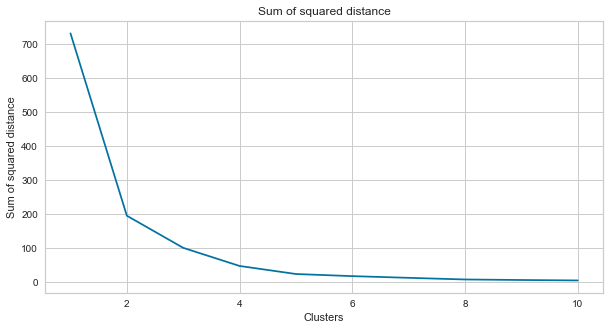

In [216]:
plt.figure(figsize = (10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [219]:
np.random.seed(42)

kmeans = KMeans(n_clusters = 3).fit(df_x)
cluster_kmeans = [i+1 for i in kmeans.labels_]
Hy["ClusterKmeans"] = cluster_kmeans
Hy

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_14596\2644405332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hy["ClusterKmeans"] = cluster_kmeans


,시군구,수소,ClusterKmeans
0,강서구,7,1
1,강서구,0,1
2,강서구,0,1
3,강서구,0,1
4,강서구,2,1
...,...,...,...
726,해운대구,0,1
727,해운대구,24,2
728,해운대구,0,1
729,해운대구,0,1


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib

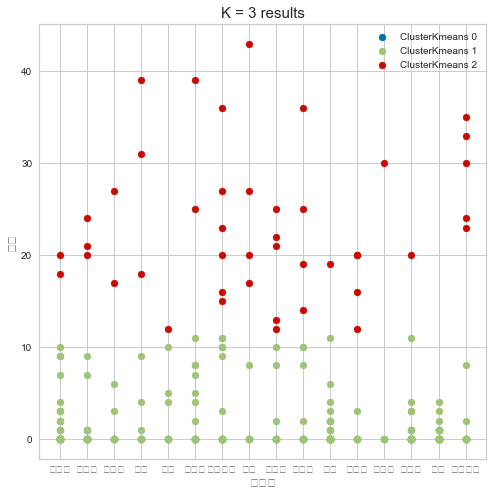

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k): plt.scatter(Hy.loc[Hy['ClusterKmeans'] == i, '시군구'], Hy.loc[Hy['ClusterKmeans'] == i, 
                                                                '수소'], 
                    label = 'ClusterKmeans ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('시군구', size = 12)
plt.ylabel('수소', size = 12)
plt.show()

In [221]:
cluster_kmeans

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,


In [222]:
kmeans.cluster_centers_

array([[-0.22337104],
       [ 2.87075433],
       [ 8.82419968]])

In [223]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [224]:
Hy["cluster"] = kmeans.labels_
Hy.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14596\3553126652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hy["cluster"] = kmeans.labels_


,시군구,수소,ClusterKmeans,cluster
0,강서구,7,1,0
1,강서구,0,1,0
2,강서구,0,1,0
3,강서구,0,1,0
4,강서구,2,1,0


In [231]:
from sklearn.decomposition import PCA
import plotly.express as px

#remember to scale your data if the ranges are too broad

# scaled_features= scaler.fit_transform(df) == df_x
# kmeans_model= KMeans(n_clusters=3, max_iter=500, random_state=42)

kmeans_model = KMeans(n_clusters = 3, random_state = 42)

y_km= kmeans_model.fit_predict(df_x)

pca_model= PCA(n_components=1, random_state=42)
transformed= pca_model.fit_transform(df_x)
centers= pca_model.transform(kmeans_model.cluster_centers_)

fig = px.scatter(x = transformed[:, 0], y = transformed[:, 1], color = y_km, 
                 text=df_raw["시군구"], title = "K-Means")
                 
                 
fig.add_scatter(
    x=centers[:, 0],
    y=centers[:, 1],
    marker=dict(size=10, color="LightSeaGreen"), name="Centers",
)
fig.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

In [168]:
from sklearn.cluster import KMeans

cluster_range = [i+1 for i in range(10)]
clus_error = []

for i in cluster_range:
    clus = KMeans(i)
    clus.fit(df_x)
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
ds_error

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

,NumberofCluster,Error
0,1,731.000000
1,2,194.767959
2,3,100.210045
3,4,47.053741
4,5,23.403297
5,6,17.147167
6,7,12.044972
7,8,7.324637
8,9,5.772509
9,10,4.396273


Text(0, 0.5, 'Sum of squared distance')

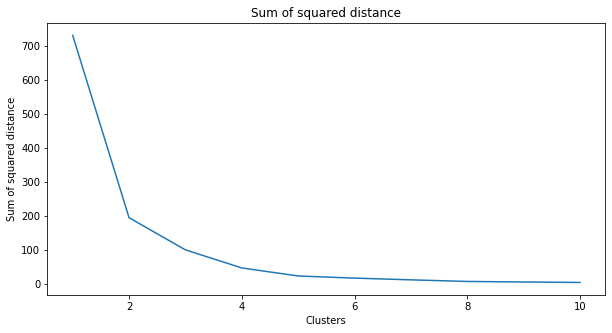

In [169]:
plt.figure(figsize = (10,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [180]:
np.random.seed(42)

kmeans = KMeans(n_clusters = 34).fit(df_x)
cluster_kmeans = [i+1 for i in kmeans.labels_]
Hy["ClusterKmeans"] = cluster_kmeans
Hy

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_14596\2535849769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hy["ClusterKmeans"] = cluster_kmeans


,시군구,수소,ClusterKmeans,cluster
0,강서구,7,12,0
1,강서구,0,4,0
2,강서구,0,4,0
3,강서구,0,4,0
4,강서구,2,16,0
...,...,...,...,...
726,해운대구,0,4,0
727,해운대구,24,31,1
728,해운대구,0,4,0
729,해운대구,0,4,0


In [181]:
cluster_kmeans

[12,
 4,
 4,
 4,
 16,
 4,
 4,
 4,
 16,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 18,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 7,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 16,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 25,
 4,
 4,
 4,
 1,
 4,
 4,
 9,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 33,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 25,
 4,
 4,
 4,
 9,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 12,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 31,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 28,
 4,
 4,
 4,
 25,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 17,
 4,
 4,
 4,
 32,
 4,
 4,
 4,
 4,
 4,
 4,
 22,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 25,
 4,
 4,
 4,
 20,
 4,
 4,
 4,
 33,
 4,
 4,
 4,
 18,
 4,
 4,
 4,
 34,
 4,
 4,
 4,
 13,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 27,
 4,
 4,
 4,
 18,
 4,
 4,
 4,
 26,
 4,
 4,
 4,
 12,
 4,
 4,
 4,
 24,
 4,
 4,
 4,
 21,
 4,
 4,
 4,
 18,
 4,
 4,
 4,
 14,
 4,
 4,
 4,
 27,
 4,
 4,
 4,
 21,
 4,
 4,
 4,
 20,
 4,
 4,
 4,
 16,
 4,
 4,
 4,

In [182]:
kmeans.cluster_centers_

array([[ 0.11063309],
       [ 2.78823949],
       [ 8.00730282],
       [-0.29781534],
       [ 1.06367944],
       [ 4.55818271],
       [10.86644185],
       [ 2.01672578],
       [ 2.42517422],
       [ 3.786669  ],
       [ 5.55661221],
       [ 0.655231  ],
       [-0.16166586],
       [ 3.10592161],
       [ 1.54020261],
       [-0.02551639],
       [ 3.37822056],
       [ 0.24678257],
       [ 4.19511743],
       [ 5.0120143 ],
       [ 0.79138048],
       [ 7.59885438],
       [ 1.74442683],
       [ 1.19982892],
       [ 0.92752996],
       [ 1.33597839],
       [ 0.38293205],
       [ 2.5613237 ],
       [ 2.28902474],
       [ 1.88057631],
       [ 2.96977213],
       [ 0.51908153],
       [ 2.15287526],
       [ 3.92281848]])

In [183]:
kmeans.labels_

array([11,  3,  3,  3, 15,  3,  3,  3, 15,  3,  3,  3,  3,  3,  3,  3, 17,
        3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  0,  3,  3,  3,  6,  3,
        3,  3, 12,  3,  3,  3, 12,  3,  3,  3, 12,  3,  3,  3, 15,  3,  3,
        3,  3,  3,  3,  3, 24,  3,  3,  3,  0,  3,  3,  8,  3,  3,  3, 12,
        3,  3,  3,  0,  3,  3,  3, 32,  3,  3,  3,  3,  3,  3,  3, 24,  3,
        3,  3,  8,  3,  3,  3, 12,  3,  3,  3, 12,  3,  3,  3, 11,  3,  3,
        3,  3,  3,  3,  3, 12,  3,  3,  3, 30,  3,  3,  3, 12,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3, 27,  3,  3,  3, 24,  3,  3,  3,  3,  3,
        3,  3,  7,  3,  3,  3,  3,  3,  3, 16,  3,  3,  3, 31,  3,  3,  3,
        3,  3,  3, 21,  3,  3,  3,  0,  3,  3,  3, 24,  3,  3,  3, 19,  3,
        3,  3, 32,  3,  3,  3, 17,  3,  3,  3, 33,  3,  3,  3, 12,  3,  3,
        3,  4,  3,  3,  3, 26,  3,  3,  3, 17,  3,  3,  3, 25,  3,  3,  3,
       11,  3,  3,  3, 23,  3,  3,  3, 20,  3,  3,  3, 17,  3,  3,  3, 13,
        3,  3,  3, 26,  3

In [184]:
Hy["cluster"] = kmeans.labels_
Hy.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14596\3553126652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hy["cluster"] = kmeans.labels_


,시군구,수소,ClusterKmeans,cluster
0,강서구,7,12,11
1,강서구,0,4,3
2,강서구,0,4,3
3,강서구,0,4,3
4,강서구,2,16,15


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\si

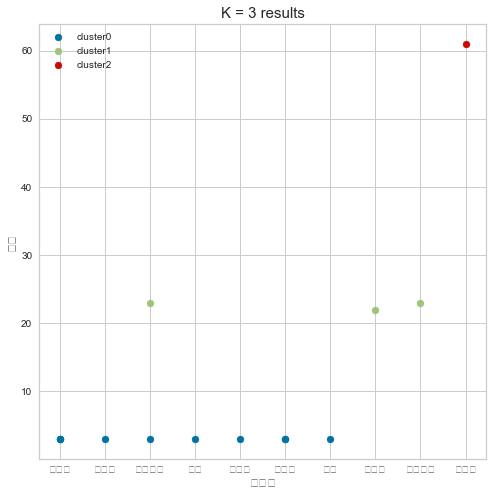

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k): plt.scatter(Hy.loc[Hy['cluster'] == i, '시군구'], Hy.loc[Hy['cluster'] == i, 
                                                                '수소'], 
                    label = 'cluster' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('시군구', size = 12)
plt.ylabel('수소', size = 12)
plt.show()

In [186]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

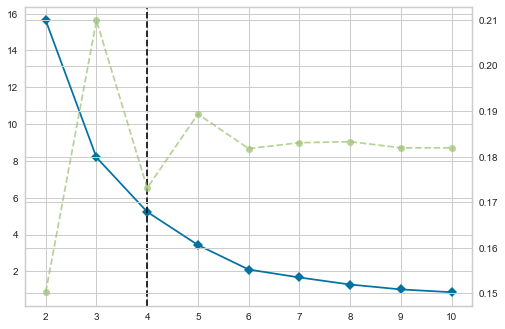

In [187]:
model = KMeans()
visualizer = KElbowVisualizer(model, K=(1,10))
visualizer.fit(data_scale)